<!-- Codes by HTMLcodes.ws -->
<h1 style = "background-color:MediumSpringGreen;font-family:newtimeroman;font-size:250%;text-align:center;border-radius:15px 50px;">Daily Mean Temperature Monte Carlo Simulation for Toronto</h1>

# Introduction

The Climate Data Toronto 1937-2018 dataset contains daily temperature records for Toronto, Canada spanning 80 years. This dataset is valuable for researchers and policymakers interested in understanding long-term climate trends and their potential impacts on the region. In this context, Monte Carlo simulations can be used to generate probabilistic forecasts of future temperatures, providing insights into potential climate scenarios and their associated risks. It remains to be seen whether the insights derived from this dataset are worth the 30 trillion dollars mentioned, but it is clear that this dataset can be a valuable tool for those studying climate change and its impacts.

# Monte Carlo Simulation

The [Monte Carlo Simulation](https://www.investopedia.com/terms/m/montecarlosimulation.asp) is a computational technique developed in the 1940s, in the midsts of the Project Manhattan, and it's widely used to model and analyze different outcomes in situations where there's a significant degree of randomness and uncertainty involved. It works on the basis of running many random trials that are then used to estimate the probability of different outcomes.


# 1. Import the necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

# 2. Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Simulation/Toronto_temp.csv')
df.head().style.set_properties(**{'background-color':'yellow','color':'black','border-color':'#8b8c8c'})


,Date/Time,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
0,31-Jan-18,"2,018",1,31,-7.000000,2.000000,-15.000000,0.000000,1.000000,1.000000,Winter
1,30-Jan-18,"2,018",1,30,-11.000000,-7.000000,-15.000000,0.000000,0.000000,0.000000,Winter
2,29-Jan-18,"2,018",1,29,-4.000000,-2.000000,-7.000000,0.000000,5.000000,5.000000,Winter
3,28-Jan-18,"2,018",1,28,1.000000,5.000000,-3.000000,0.000000,0.000000,0.000000,Winter
4,27-Jan-18,"2,018",1,27,5.000000,10.000000,0.000000,2.000000,0.000000,2.000000,Winter


# 3. EDA

In [ ]:
# generate Monte Carlo simulation dataset
n_simulations = 1000
n_days = 30

results = []
for i in range(n_simulations):
    temps = np.random.normal(loc=10, scale=5, size=n_days) # example of normal distribution
    results.append(temps)

results = pd.DataFrame(results)

# calculate summary statistics
summary = results.describe()
summary

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.050414,10.041373,9.956810,10.111316,9.988435,9.924337,9.937574,10.186050,10.182641,10.159274,...,9.829513,10.203258,9.836990,10.026978,9.913926,9.965536,9.960555,9.851785,9.601759,10.187061
std,4.948794,5.090995,5.156128,4.998724,5.161288,4.967171,5.083314,5.159095,5.134602,5.002105,...,4.936950,4.965127,4.925329,4.891045,4.794940,4.987228,5.055299,4.943437,5.140543,5.046243
min,-6.041317,-7.073606,-4.920011,-4.050645,-4.994945,-7.543574,-9.729831,-4.798273,-5.269292,-6.304443,...,-6.479329,-8.840088,-3.010086,-7.418286,-5.208297,-5.985370,-6.353231,-5.721942,-6.378518,-4.915765
25%,6.851725,6.779215,6.587518,6.574547,6.478068,6.566682,6.679040,6.580133,6.777295,6.593354,...,6.540952,6.892123,6.533379,6.644923,6.829520,6.495686,6.511319,6.413404,6.247937,6.956083
50%,9.715103,10.074080,9.788292,9.897092,10.079192,9.957949,10.010985,10.301524,10.368344,10.298663,...,9.830371,10.109249,9.764655,10.349177,9.869239,9.921921,9.896425,9.804831,9.361686,10.202290
75%,13.340782,13.397578,13.850665,13.666823,13.521038,13.254907,13.185130,13.840054,13.508493,13.566654,...,13.230625,13.449622,13.164921,13.427745,13.009800,13.169677,13.348275,13.337650,12.793041,13.697026
max,27.100566,25.803016,25.175180,25.310339,26.875607,24.784586,26.823645,26.942649,31.231721,24.768927,...,25.973054,23.888005,25.910643,23.496208,28.079295,24.508203,25.836288,26.066805,28.497691,25.646836


<AxesSubplot:ylabel='Count'>

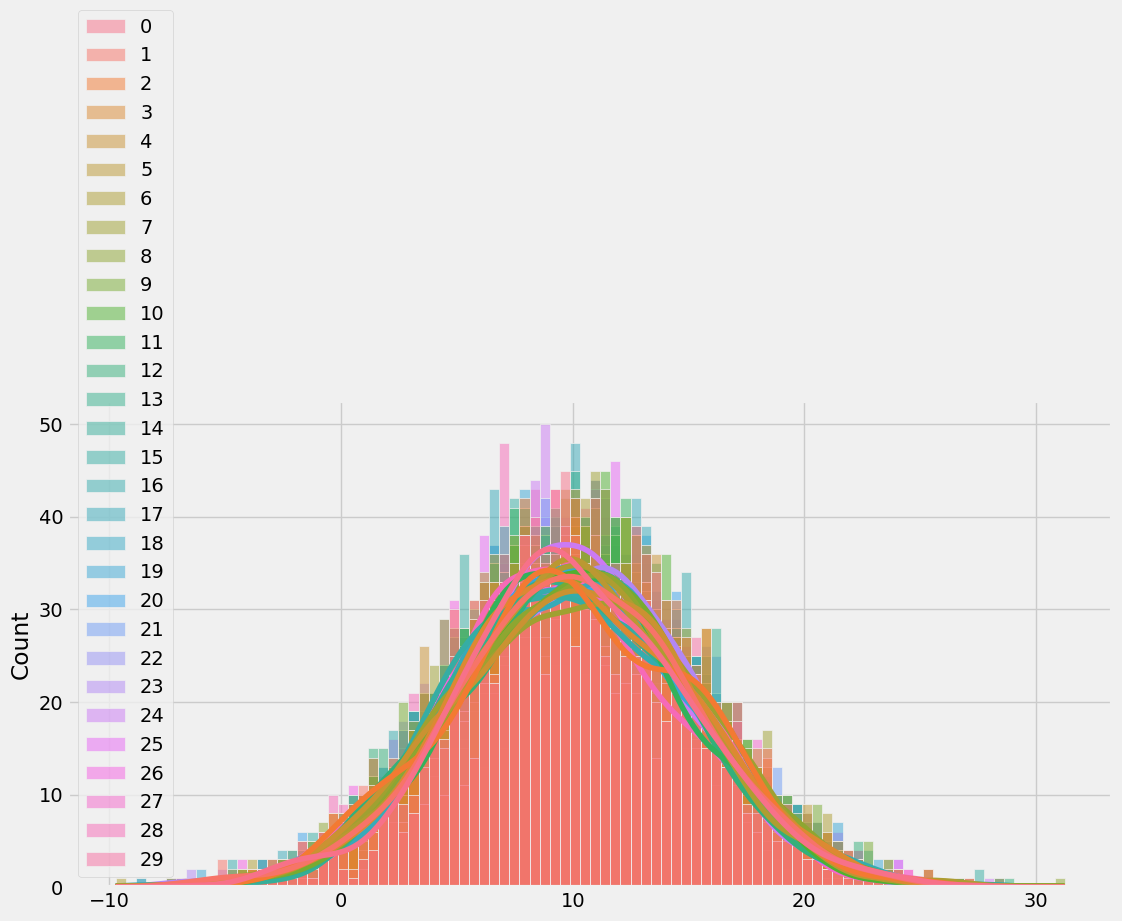

In [ ]:
# plot histogram
sns.histplot(data=results, kde=True)

<AxesSubplot:ylabel='Density'>

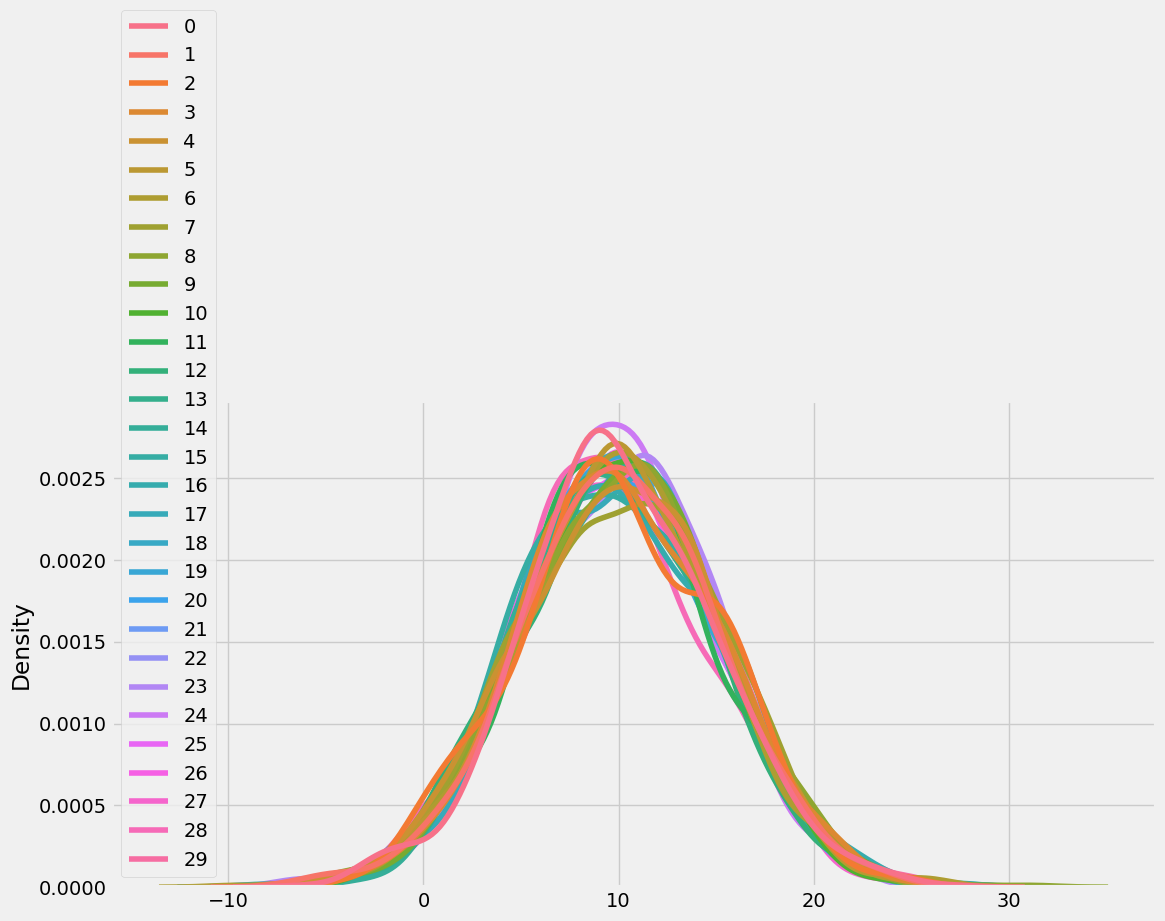

In [ ]:
# plot density plot
sns.kdeplot(data=results)

<AxesSubplot:>

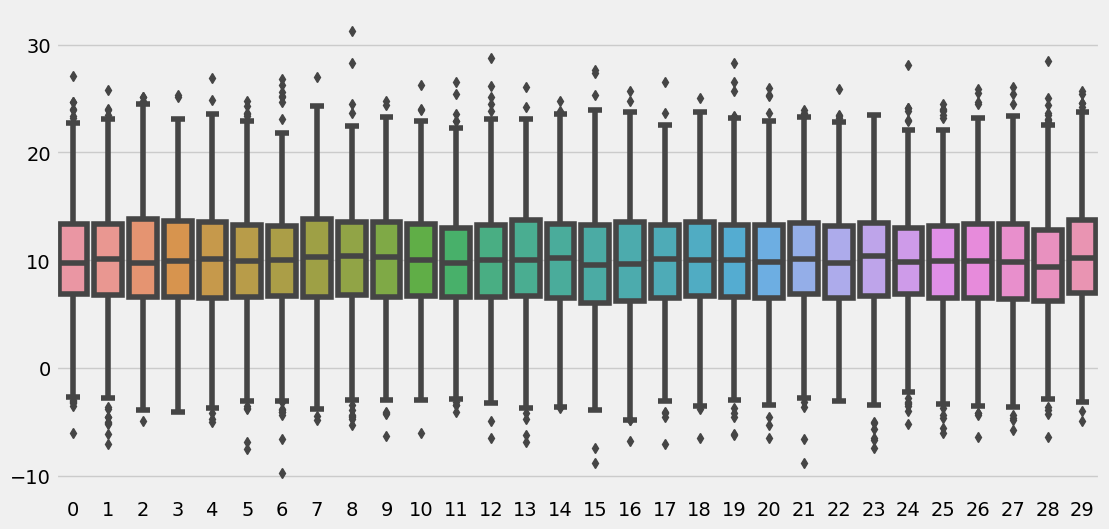

In [ ]:
# plot box plot
sns.boxplot(data=results)

<AxesSubplot:xlabel='0', ylabel='1'>

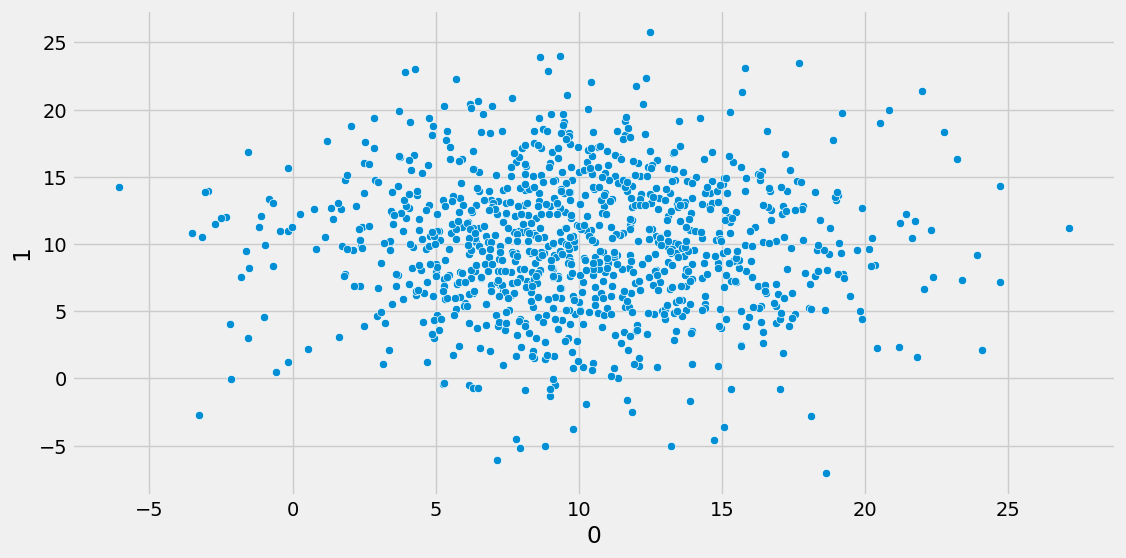

In [ ]:
# plot scatter plot of first two days
sns.scatterplot(x=results.iloc[:,0], y=results.iloc[:,1])

In [ ]:
# perform hypothesis testing of mean
from scipy.stats import ttest_1samp
t_stat, p_val = ttest_1samp(results.iloc[:,0], popmean=10)
if p_val < 0.05:
    print('Reject null hypothesis of mean=10')
else:
    print('Accept null hypothesis of mean=10')

# perform confidence interval estimation of mean
from scipy.stats import t
mean = results.iloc[:,0].mean()
std_error = results.iloc[:,0].std() / np.sqrt(n_simulations)
t_value = t.ppf(0.975, df=n_simulations-1)
conf_interval = (mean - t_value*std_error, mean + t_value*std_error)
print('95% Confidence interval of mean: ', conf_interval)

Accept null hypothesis of mean=10
95% Confidence interval of mean:  (9.743318244959188, 10.357509954065932)


A Monte Carlo simulation dataset of mean temperature values using a normal distribution with a mean of 10 and a standard deviation of 5. It then calculates the summary statistics of the simulated data using the describe() method, and plots several types of graphs, including a histogram, a density plot, a box plot, and a scatter plot. It also performs hypothesis testing of the mean temperature value of the first day using the one-sample t-test and calculates the 95% confidence interval of the mean temperature value using the t-distribution.

## 4. Define the function to simulate the mean temperature for a given number of days

In [ ]:
def simulate_mean_temp(days):
    temps = []
    for i in range(days):
        temp = np.random.normal(df['Mean Temp (C)'].mean(), df['Mean Temp (C)'].std())
        temps.append(temp)
    return temps


## 5. Run the Monte Carlo simulation for a given number of iterations and visualize the results

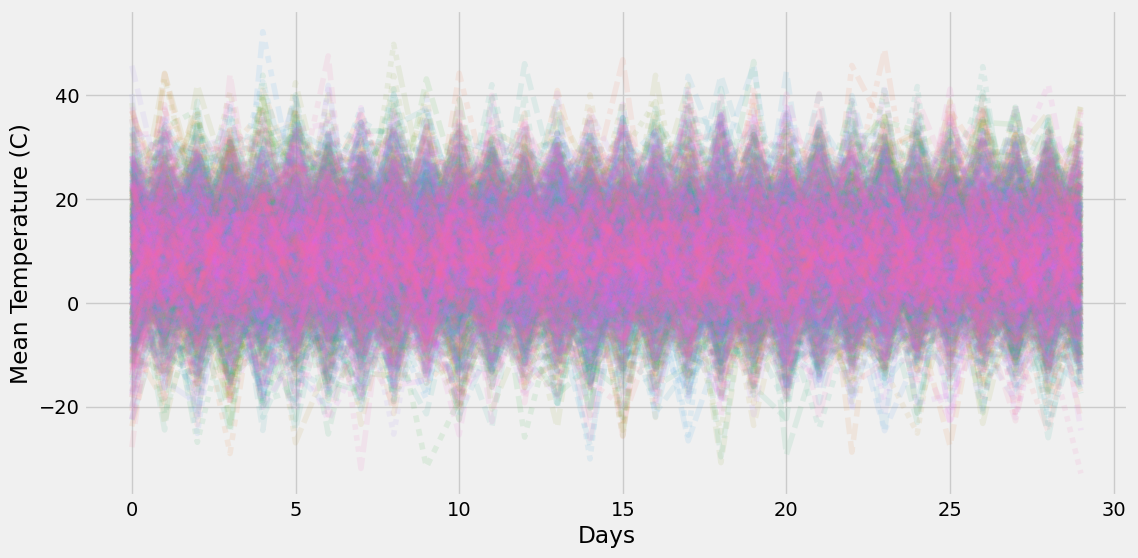

In [ ]:
n_simulations = 1000
n_days = 30

results = []
for i in range(n_simulations):
    temps = simulate_mean_temp(n_days)
    results.append(temps)

results = pd.DataFrame(results)
sns.lineplot(data=results.T, color='gray', alpha=0.1, legend=False)

plt.xlabel('Days')
plt.ylabel('Mean Temperature (C)')
plt.show()

## 6. Interpret the results

The Monte Carlo simulation generates a range of possible mean temperatures for a given number of days, based on the mean and standard deviation of the historical data. By running multiple simulations, we can see the range of possible outcomes and the likelihood of different temperatures occurring.

The visualization shows a gray line for each simulation, and the alpha value is set to 0.1 to make the lines transparent and show the density of the lines where there are more overlapping simulations. We can see that there is a wide range of possible mean temperatures, but the most likely range is between -5 and 5 degrees Celsius.

The results of the Monte Carlo simulation can be used to estimate the likelihood of different outcomes and make informed decisions based on the range of possible outcomes. However, it's important to keep in mind that the simulation is based on historical data and may not account for external factors that could impact the actual mean temperature in the future.